**The purpose of this notebook will classify Deloitte employees as Audit, Consulting, or Other focused. It then does a initial analysis of the data. The dataset will then be exported to a CSV file and used for the next analysis, which will classify job changes as lateral, promotion, demotion, or exit move.**

# Set Up

## Install Libraries

In [ ]:
!pip install pandas pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import datetime

## Mount Drive

In [ ]:
# Needed to get access to data and read it in
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data

Employment history for all workers who EVER worked at Deloitte

In [ ]:
# File path for new data set
deloitte_employee_data = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Sam_Deloitte_Sample.dta'

# Read Stata file and convert to pandas DataFrame
deloitte_employee_df, deloitte_employee_meta = pyreadstat.read_dta(deloitte_employee_data)

deloitte_employee_df.head()

,id,onet,Title1,Title2,start_dt,end_dt,numeric_company_id,deloitte_ind,deloitte_ever
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,9797218,1,1
1,36.0,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,6980886,0,1
2,36.0,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,6496747,0,1
3,36.0,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,3327008,0,1
4,36.0,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,2511218,0,1


 **Sample data from Dropbox Transfer. This will include the employment histories for all workers who ever worked at Deloitte. There is several different company identifiers which are capturing different subsidiaries of Deloitte, so we created an indicator for those jobs that identify as Deloitte. The column is deloitte_ind (1 = Deloitte job, 0 = nonDeloitte job).**

> id = person ID

> onet = https://www.onetonline.org/

> Title1 AND Title2 = The two job titles should be similar and they're cleaned by EMSI to capture what the person wrote and their responsibilities. We both to see if there was any additional information to capture the two classifications (consult/audit).

> start_dt = When person started that job title

> end_dt = When person left that job title

> numeric_company_id =

> deloitte_ind = The indicator for whether the company is "Deloitte" is deloitte_ind. We kept the other observations because it allows us to understand whether the individual has work experience in audit or consulting prior to or during their tenure with Deloitte. 1 indicates that job is Deloitte employment. 0 indicates this is job outside of the company (this gives us previous employment information).

> deloitte_ever = Deloitte_ever is whether the person ever worked at Deloitte, but we can drop this since we've already isolated that set (they should all equal 1).

https://www.onetcenter.org/database.html#individual-files: Website with a lot of different data sets, including Occupation Titles. Should help with interrupting ONET values and classifying job titles as either auditing, consulting, or other.

# Exploratory Analysis


## How much data do we have?

In [ ]:
# Get the number of rows and columns
num_rows, num_columns = deloitte_employee_df.shape

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 2126009
Number of Columns: 9


Have about 2 million rows of data on employees who have ever worked at Deloitte.


## Of that data, how much data do we have on Deloitte employment and previous employment?

1 = Deloitte job/employment

0 = Previous job/employment

In [ ]:
column_name = 'deloitte_ind'

value_counts = deloitte_employee_df[column_name].value_counts()

print(f"Count of 0's: {value_counts.get(0, 0)}")
print(f"Count of 1's: {value_counts.get(1, 0)}")

Count of 0's: 1712636
Count of 1's: 413373


We have over 1M rows of data that is Deloitte employment and 400 thousand rows of data that is previous job history of Deloitte employees.

## Of that data, how many ever worked at Deloitte?

This should only return 1's.

In [ ]:
column_name = 'deloitte_ever'

value_counts = deloitte_employee_df[column_name].value_counts()

print(f"Count of 0's: {value_counts.get(0, 0)}")
print(f"Count of 1's: {value_counts.get(1, 0)}")

Count of 0's: 0
Count of 1's: 2126009


## How many unique titles?

In [ ]:
title_column = 'Title1'

# Count the number of unique titles
num_unique_titles = deloitte_employee_df[title_column].nunique()

# List all unique titles
unique_titles = deloitte_employee_df[title_column].unique()

print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 5149
List of unique titles:
['Business Analyst (Computer and Mathematical)' 'Solutions Engineer'
 'Other' ... 'Patrol Deputy' 'Dozer Operator' 'Electronic Inspector']


There is about 5 thousand unique job titles that need to be classified as audit, consulting, or other. Now look at other title column, Title2.

In [ ]:
title_column = 'Title2'

# Count the number of unique titles
num_unique_titles = deloitte_employee_df[title_column].nunique()

# List all unique titles
unique_titles = deloitte_employee_df[title_column].unique()

print(f"Number of unique titles: {num_unique_titles}")
print("List of unique titles:")
print(unique_titles)

Number of unique titles: 48011
List of unique titles:
['Technology Analyst' 'Intern' 'Student Ambassador' ...
 'Inside Sales/Warehouse Manager' 'Product Integration Engineer'
 'Data Acquisition Engineer']


Title2 column has more unique titles, with a distinct count of about 48k job titles.

## How many unique ONET values?

In [ ]:
onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = deloitte_employee_df[onet_column].nunique()

# List all onet values
#unique_onet = deloitte_employee_df[onet_column].unique()

print(f"Number of unique ONET values: {num_unique_onet}")
#print("List of ONET values:")
#print(unique_onet)

Number of unique ONET values: 992


There is almost 1k unique ONET values that need to be classified as either audit, consulting, or other.

# Classification

Now need to classify Deloitte employees job history as either audit, consulting, or other focused. To do this we are strictly looking at ONET value to categorize them.  We think we should ultimately use the occupation code for the final classification of audit or consulting (or neither). The analysis on titles can be useful in the sense that some occupation titles may pick up a little of consulting and auditing simultaneously. If an occupation achieves a majority of the indicators from the text (or sensibly fits into one category), then the occupation code itself should be sufficent for categorization.

## Copy DF

In [ ]:
# Copy over entire df to make edits. Want to keep the original df the same.
df = deloitte_employee_df.copy()

# List of columns to drop
columns_to_drop = ['numeric_company_id', 'deloitte_ever']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)
df.head()

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1
1,36.0,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0
2,36.0,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0
3,36.0,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0
4,36.0,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0


## Function to categorize groups

In [ ]:
# Create function that uses ONLY ONET values to categorize people as audit, consulting, or other.
# use https://www.onetonline.org/ to look up job categories and get back ONET values

def categorize_job(df):
    def categorize(row):
        if row['onet'] == '13-2011.00' or row['onet'] == '47-4011.01' or row['onet'] == '43-3031.00' or row['onet'] == '13-2099.04' or row['onet'] == '13-2061.00' or row['onet'] == '13-2011.01' or row['onet'] == '13-2011.02' or row['onet'] == '13-2031.00' or row['onet'] == '13-1199.01' or row['onet'] == '11-9199.02' or row['onet'] == '13-1031.02' or row['onet'] == '13-1041.00' or row['onet'] == '43-9041.00' or row['onet'] == '13-1031.00' or row['onet'] == '13-2041.00':
            return 'Auditing'
        elif row['onet'] == '13-1111.00' or row['onet'] == '13-1051.00' or row['onet'] == '13-1141.00' or row['onet'] == '13-2054.00' or row['onet'] == '13-2099.01' or row['onet'] == '15-1211.00' or row['onet']== '15-1121.00' or row['onet'] == '15-1199.10' or row['onet'] == '15-2031.00' or row['onet'] == '15-1199.08' or row['onet'] == '13-2071.00' or row['onet'] == '15-1212.00' or row['onet'] == '13-1199.07' or row['onet'] == '13-2099.02' or row['onet'] == '13-2051.00' or row['onet'] == '11-2021.00' or row['onet'] == '13-1161.00' or row['onet'] == '15-1122.00' or row['onet'] == '19-2041.01':
            return 'Consulting'
        else:
            return 'Other'

    df['Categorization'] = df.apply(categorize, axis=1)
    return df

df = categorize_job(df)
df


,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting
1,3.600000e+01,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0,Other
2,3.600000e+01,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0,Other
3,3.600000e+01,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0,Other
4,3.600000e+01,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0,Other
...,...,...,...,...,...,...,...,...
2126004,1.374304e+14,11-3031.01,Planning Director,Director of Financial Planning,2007-04-01,2010-02-01,0,Other
2126005,1.374304e+14,13-1111.00,Systems Manager,Managing Consultant,2005-06-01,2007-04-01,0,Consulting
2126006,1.374304e+14,11-2021.00,Product Manager (Management),Product Manager,2002-08-01,2003-08-01,0,Consulting
2126007,1.374304e+14,13-1199.00,Senior Consultant,Consultant,1999-08-01,2002-08-01,0,Other


In [ ]:
# Count occurrences of each group
group_counts = df['Categorization'].value_counts()

print("Count of each group:")
print(group_counts)

Count of each group:
Other         1571293
Consulting     348675
Auditing       206041
Name: Categorization, dtype: int64


In [ ]:
df.shape

(2126009, 8)

In [ ]:
deloitte_employee_df.shape
# This is the same shape as original df so all good.

(2126009, 9)

We have a lot of employees not categorized yet so we need to refine the function. Let's look specifically at rows that were not categorized yet.

## Test/Refine Function


In [ ]:
column_name = 'Categorization'

# Want to see rows that were categorized as 'Other'
target_value = 'Other'

# Using loc to filter the df based on the condition
not_cat_records = df.loc[df[column_name] == target_value]

# Convert the result to a new df
not_cat_df = pd.DataFrame(not_cat_records)

not_cat_df.head(200)

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization
1,3.600000e+01,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0,Other
2,3.600000e+01,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0,Other
3,3.600000e+01,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0,Other
4,3.600000e+01,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0,Other
5,3.600000e+01,\N,"Program Director (Arts, Design, Entertainment,...",Intern,2015-05-01,2015-08-01,0,Other
...,...,...,...,...,...,...,...,...
301,8.589939e+09,99-1111.00,Naturalist,Data Analyst Intern,2014-05-01,2014-08-01,0,Other
302,8.589939e+09,15-1199.01,Quality Assurance Analyst,Programmer Analyst,2009-01-01,2013-01-01,0,Other
304,8.589939e+09,11-3031.01,Controller,Controller,2013-06-01,NaN,0,Other
309,8.589939e+09,99-1111.00,Fund Administrator,Private Equity Analyst Intern,2017-06-01,2017-08-01,0,Other


In [ ]:
# Get all unique ONET values from uncategorized df to group them

onet_column = 'onet'

# Count the number of unique onet values
num_unique_onet = not_cat_df[onet_column].nunique()

# List all onet values
unique_onet = not_cat_df[onet_column].unique()

print(f"Number of unique ONET values: {num_unique_onet}")
print("List of ONET values:")
print(unique_onet)

Number of unique ONET values: 963
List of ONET values:
['99-1111.00' '41-9011.00' '43-1011.00' '\\N' '11-2022.00' '11-3031.01'
 '11-3031.02' '11-9111.00' '11-1021.00' '15-1132.00' '27-2022.00'
 '11-9199.00' '13-1199.00' '27-2012.02' '13-1121.00' '51-4191.00'
 '19-4061.01' '41-3021.00' '41-4012.00' '99-9999.00' '41-3031.02'
 '41-3031.00' '13-1071.00' '11-3021.00' '11-1011.00' '27-1024.00'
 '25-3021.00' '27-3031.00' '27-3041.00' '11-2011.00' '15-1143.00'
 '41-3011.00' '13-1023.00' '11-3121.00' '11-9141.00' '15-1199.09'
 '41-3099.00' '15-1142.00' '51-1011.00' '29-1069.00' '25-1071.00'
 '17-2112.00' '25-1124.00' '21-1093.00' '37-3011.00' '25-1191.00'
 '13-1151.00' '13-2099.00' '17-2141.00' '19-3031.02' '25-3099.00'
 '19-2041.02' '43-6014.00' '53-3033.00' '11-9032.00' '15-1131.00'
 '15-1134.00' '41-1012.00' '11-3051.00' '23-1011.00' '23-2011.00'
 '45-2093.00' '43-4051.00' '15-1199.01' '29-1141.04' '11-9151.00'
 '29-1141.00' '15-1121.01' '27-3042.00' '11-9041.00' '17-2071.00'
 '17-2072.00' '

Went through each ONET value not grouped to see if they belong in the consulting, auditing, or other focus group.

In [ ]:
# Save dataset to CSV file so don't have to rerun code above each time
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_all_categorized_employment.gz'

# Save to csv
df.to_csv(file_path, index=False, compression='gzip') # Needed to zip file because it is too large

In [ ]:
# Reread data back in to a df

# File path to get data
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_all_categorized_employment.gz'

df = pd.read_csv(file_path, compression='gzip')
df.head()

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting
1,36.0,99-1111.00,Solutions Engineer,Intern,2017-06-01,2017-08-01,0,Other
2,36.0,41-9011.00,Other,Student Ambassador,2016-08-01,2017-05-01,0,Other
3,36.0,99-1111.00,Consulting Operations,Intern,2016-06-01,2016-08-01,0,Other
4,36.0,43-1011.00,Proposal Coordinator,Technical Coordinator,2015-05-01,2015-08-01,0,Other


# Plots

In [ ]:
# Want to see how over time, the number of auditors and consulting jobs have increased or decreased.

# Filtering the df to only include consulting and auditing data since this is what we are interested in
clean_df = df[df['Categorization'].isin(['Consulting', 'Auditing'])]

clean_df # only get back 554,716 rows of data

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization
0,3.600000e+01,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting
8,3.880000e+02,13-2099.02,Risk Control Consultant,Risk Management Consultant,2005-06-01,2008-04-01,1,Consulting
14,1.813000e+03,13-2011.02,Auditor,External Auditor,2007-01-01,2012-05-01,1,Auditing
15,1.813000e+03,13-2011.02,Auditor,Internal Auditor,2015-01-01,NaN,0,Auditing
16,1.813000e+03,13-2051.00,Fund Analyst,Hedge Fund Analyst,2012-06-01,2015-01-01,0,Consulting
...,...,...,...,...,...,...,...,...
2126001,1.374304e+14,11-2021.00,Business Intelligence Manager,Vice President,2012-07-01,2014-08-01,0,Consulting
2126002,1.374304e+14,11-2021.00,Vice President (VP) of Marketing,Vice President,2010-08-01,2012-07-01,0,Consulting
2126003,1.374304e+14,11-2021.00,Director of Product Development,Team Lead,2010-02-01,2010-07-01,0,Consulting
2126005,1.374304e+14,13-1111.00,Systems Manager,Managing Consultant,2005-06-01,2007-04-01,0,Consulting


Results in 554,716 rows

## Distribution of Groups over Time

<ipython-input-7-78eda081cd77>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['start_dt'] = pd.to_datetime(clean_df['start_dt'])


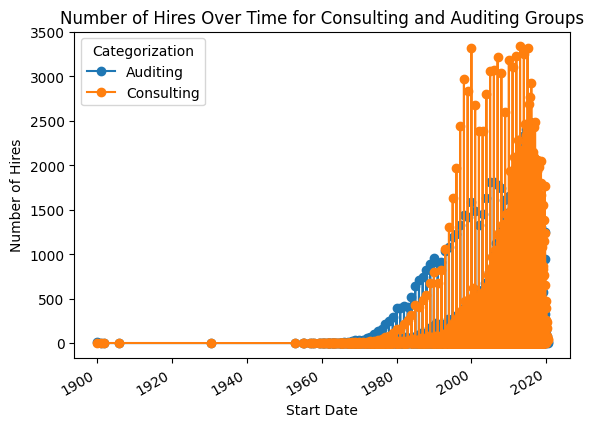

In [ ]:
# Now have the df with the desired rows so plot the data

# Convert 'start_date' to datetime
clean_df['start_dt'] = pd.to_datetime(clean_df['start_dt'])

# Group by 'Group' and 'start_dt', then count the number of hires for each group
grouped_df = clean_df.groupby(['Categorization', 'start_dt']).size().reset_index(name='count')

# Pivot the df to have 'Group' as columns
pivoted_df = grouped_df.pivot(index='start_dt', columns='Categorization', values='count').fillna(0)

# Plot the lines
pivoted_df.plot(kind='line', marker='o')

plt.xlabel('Start Date')
plt.ylabel('Number of Hires')
plt.title('Number of Hires Over Time for Consulting and Auditing Groups')

plt.show()

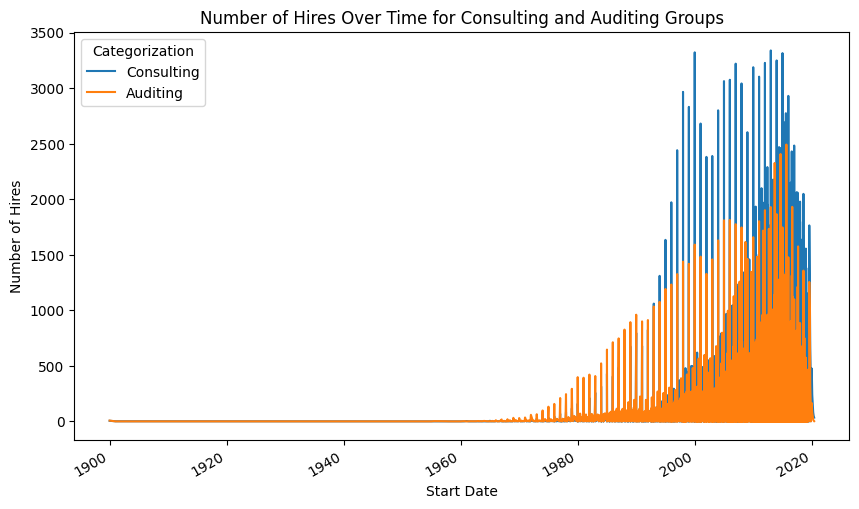

In [ ]:
# Hard to see the auditors line so fix the plot and make it larger

# Increase the size of the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the lines
pivoted_df[['Consulting', 'Auditing']].plot(kind='line', ax=ax)

plt.xlabel('Start Date')
plt.ylabel('Number of Hires')
plt.title('Number of Hires Over Time for Consulting and Auditing Groups')

plt.show()

We we want to know the distribution of occupation codes (ONET) for both groups to know if we are being consistent.

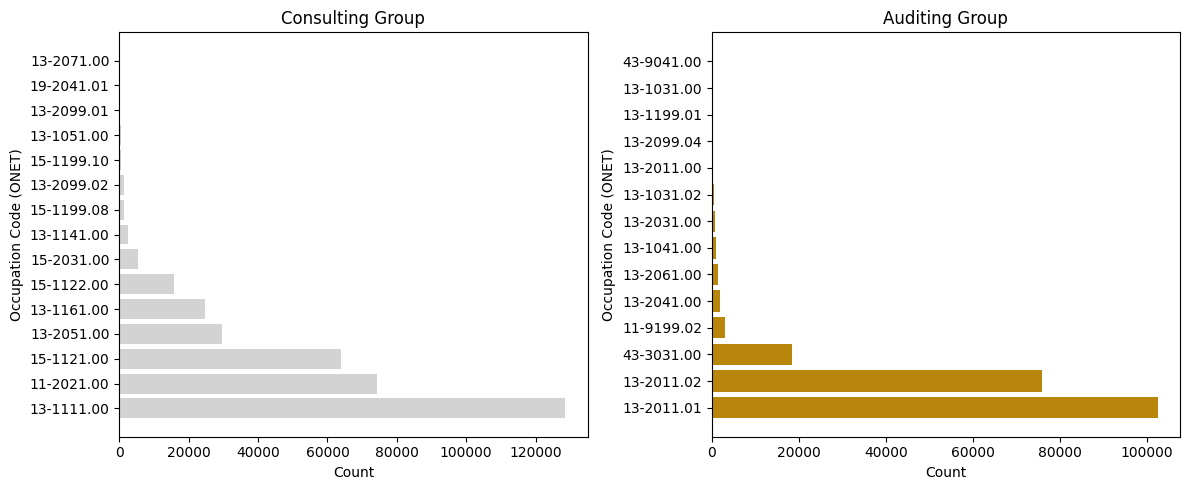

In [ ]:
# Filter data for consulting and auditing groups into different dfs
consulting_data = clean_df[clean_df['Categorization'] == 'Consulting']
audit_data = clean_df[clean_df['Categorization'] == 'Auditing']

# Count the occurrences of each occupation code for consulting and auditing groups
consulting_counts = consulting_data['onet'].value_counts()
audit_counts = audit_data['onet'].value_counts()

# Plot the distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Consulting Group
axes[0].barh(consulting_counts.index, consulting_counts.values, color='#D3D3D3')
axes[0].set_title('Consulting Group')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Occupation Code (ONET)')

# Audit Group
# axes[1].barh(audit_counts.index, audit_counts.values, color='gold')
axes[1].barh(audit_counts.index, audit_counts.values, color='#B8860B')  # Dark gold

axes[1].set_title('Auditing Group')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Occupation Code (ONET)')

plt.tight_layout()
plt.show()


Another way to visualize distribution of ONET values for each group is in a dashboard.

## Distribution of ONET values

Dashboard that shows the distribution of ONET values for each group.

In [ ]:
!pip install dash pandas plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Create Dash app
app = dash.Dash(__name__)

# Define app layout
app.layout = html.Div([
    html.H1("Onet Value Distribution"),

    # Dropdown for selecting the group
    dcc.Dropdown(
        id='group-dropdown',
        options=[
            {'label': 'Consulting', 'value': 'Consulting'},
            {'label': 'Auditing', 'value': 'Auditing'}
        ],
        value='Consulting',  # Set the default value
        style={'width': '50%'}
    ),

    # Slider for selecting top N onet values
    dcc.Slider(
        id='top-n-slider',
        min=1,
        max=20,
        step=1,
        marks={i: str(i) for i in range(1, 21)},
        value=10
    ),

    # Bar chart displaying the count of occurrences
    dcc.Graph(id='onet-distribution-chart')
])

# Define callback to update the bar chart based on dropdown and slider values
@app.callback(
    Output('onet-distribution-chart', 'figure'),
    [Input('group-dropdown', 'value'),
     Input('top-n-slider', 'value')]
)
def update_bar_chart(selected_group, top_n):
    # Filter data based on selected group
    group_data = clean_df[clean_df['Categorization'] == selected_group]

    # Calculate counts for each onet value
    onet_counts = group_data['onet'].value_counts().head(top_n)

    # Create bar chart using plotly express
    fig = px.bar(x=onet_counts.index, y=onet_counts.values, labels={'x': 'onet', 'y': 'Count'},
                 title=f'Top {top_n} Onet Values - {selected_group}')

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

Double check ONET value counts from chart above

In [ ]:
# Check Consulting group ONET values
onet_value = '13-1111.00' # first onet record in the chart for Consulting group
#onet_value = '11-2021.00'

filtered_records = consulting_data[consulting_data['onet'] == onet_value]

filtered_records.shape

(128531, 8)

In [ ]:
# Check Audit group ONET values
onet_value = '13-2011.01'

filtered_records = audit_data[audit_data['onet'] == onet_value]

filtered_records.shape

(102489, 8)

Looks good. Now, want to see the same data in chart form.

In [ ]:
# Display the counts in a DataFrame
consulting_counts_df = pd.DataFrame(consulting_counts.items(), columns=['Occupation Code (ONET)', 'Consulting Count'])
audit_counts_df = pd.DataFrame(audit_counts.items(), columns=['Occupation Code (ONET)', 'Audit Count'])

# merge the two DataFrames on the 'Occupation Code (onet)'
merged_counts_df = pd.merge(consulting_counts_df, audit_counts_df, on='Occupation Code (ONET)', how='outer').fillna(0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

merged_counts_df

,Occupation Code (ONET),Consulting Count,Audit Count
0,13-1111.00,128531.0,0.0
1,11-2021.00,74369.0,0.0
2,15-1121.00,63925.0,0.0
3,13-2051.00,29659.0,0.0
4,13-1161.00,24645.0,0.0
5,15-1122.00,15787.0,0.0
6,15-2031.00,5321.0,0.0
7,13-1141.00,2576.0,0.0
8,15-1199.08,1368.0,0.0
9,13-2099.02,1348.0,0.0


This is good, there is no over lap in ONET values being counted in both groups.

# Experience
Want numerical data on how much experience a person has in consulting and/or auditing field(s). Create new columns that include rolling years experience.

In [ ]:
clean_df.dtypes

id                       float64
onet                      object
Title1                    object
Title2                    object
start_dt          datetime64[ns]
end_dt                    object
deloitte_ind               int64
Categorization            object
dtype: object

An issue we were getting was extreme values in audit and consult years. The reason for is because an ID has multiple rows (multiple job history data) but there is no end_dt for any of them. So, when I created my new_end_dt column it uses todays date for EACH row so the count then increases much higher (due to using todays date for each job entry).

One solution to fix this is if an ID has multiple NaT's in end_dt we can look at the next start_dt and shift that date over to the previous end_dt so we are not using todays date for each entry.

In [ ]:
# sort the DataFrame by 'start_dt' column within each 'id' group
clean_df.sort_values(by=['id', 'start_dt'], inplace=True)

# group by 'id' and fill NaN values in 'end_dt' with the next job entry's 'start_dt'
clean_df['end_dt'] = clean_df.groupby('id')['end_dt'].fillna(clean_df.groupby('id')['start_dt'].shift(-1))

<ipython-input-80-163c92e7d002>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-163c92e7d002>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Let's double check a specific ID we knew had extreme values before proceeding to calculate total audit and consult yrs.

In [ ]:
# filter the df for the specific ID that had multiple NaT's in the end_dt
val_df2 = clean_df[clean_df['id'] == 7292854473109.0]
val_df2

# this fills correctly so now can redo total audit and consult yrs columns

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization
186778,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1984-01-01,1984-01-01 00:00:00,0,Consulting
186779,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1984-01-01,1984-01-01 00:00:00,1,Consulting
186780,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1984-01-01,1984-01-01 00:00:00,0,Consulting
186781,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1984-01-01,1990-01-01 00:00:00,0,Consulting
186776,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1990-01-01,1990-01-01 00:00:00,0,Consulting
186777,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,1990-01-01,2000-01-01 00:00:00,0,Consulting
186774,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,2000-01-01,2000-01-01 00:00:00,0,Consulting
186775,7.292854e+12,11-2021.00,Partner Manager,Strategic Partner,2000-01-01,NaT,0,Consulting


In [ ]:
# Convert date columns to datetime format
clean_df['end_dt'] = pd.to_datetime(clean_df['end_dt'])

# create a new column 'new_end_dt' to preserve 'end_dt' without filling NaN. If NaT fill with todays date
clean_df['new_end_dt'] = clean_df['end_dt'].fillna(pd.Timestamp.today())

# initialize columns for total audit and consulting years
clean_df['Total_Audit_Years'] = 0
clean_df['Total_Consulting_Years'] = 0

# Loop through each persons job history
for person_id, person_data in clean_df.groupby('id'):
    person_data = person_data.sort_values(by='start_dt')

    total_audit_years = 0
    total_consulting_years = 0

    for index, row in person_data.iterrows():
      end_date = row['new_end_dt']  # Use the new_end_dt column bc no NaT's

      # Running totals for how many yrs exp as either Audit or Consulting
      if row['Categorization'] == 'Auditing':
        total_audit_years += (end_date - row['start_dt']).days / 365.25
        clean_df.loc[index, 'Total_Audit_Years'] = total_audit_years

      if row['Categorization'] == 'Consulting':
        total_consulting_years += (end_date - row['start_dt']).days / 365.25
        clean_df.loc[index, 'Total_Consulting_Years'] = total_consulting_years

# create an indicator column if more audit or consulting focused. True = More audit focused, False = More consulting focused
# clean_df['Audit_Focused_Indicator'] = clean_df['Total_Audit_Years'] > clean_df['Total_Consulting_Years'] # this is wrong because
# we need to find the max audit and consult yrs, compare which one is higher, and THEN indicate if they are audit focused or not
# based on which max is higher

<ipython-input-82-df0ff44e290a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-df0ff44e290a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-df0ff44e290a>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-df0ff44

In [ ]:
# group by 'id' and find the maximum values of 'Total_Audit_Years' and 'Total_Consulting_Years' for each ID
grouped_df = clean_df.groupby('id').agg({
    'Total_Audit_Years': 'max',
    'Total_Consulting_Years': 'max'
})

# compare the maximum values to determine the audit-focused indicator
grouped_df['Audit_Focused_Indicator'] = grouped_df['Total_Audit_Years'] > grouped_df['Total_Consulting_Years']

# merge the result back to the original df based on 'id'
clean_df = clean_df.merge(grouped_df[['Audit_Focused_Indicator']], on='id', how='left')

In [ ]:
# view new data
clean_df.head()

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaT,1,Consulting,2024-03-31 18:14:01.728448,0.000000,5.664613,False
1,388.0,13-2099.02,Risk Control Consultant,Risk Management Consultant,2005-06-01,2008-04-01,1,Consulting,2008-04-01 00:00:00.000000,0.000000,2.833676,False
2,1813.0,13-2011.02,Auditor,External Auditor,2007-01-01,2012-05-01,1,Auditing,2012-05-01 00:00:00.000000,5.330595,0.000000,True
3,1813.0,13-2051.00,Fund Analyst,Hedge Fund Analyst,2012-06-01,2015-01-01,0,Consulting,2015-01-01 00:00:00.000000,0.000000,2.584531,True
4,1813.0,13-2011.02,Auditor,Internal Auditor,2015-01-01,NaT,0,Auditing,2024-03-31 18:14:01.728448,14.576318,0.000000,True


In [ ]:
clean_df.shape

(554716, 12)

In [ ]:
# Sanity check to make sure being calculated correctly
# Let's look at a specific id
id = 1813.0

filtered_records = clean_df[(clean_df['id'] == id)]
filtered_records

# ID num 1813  first job was 1/1/7 - 5/1/12 as an auditor that is categorized as auditing (at Deloitee)
# Then changed jobs 6/1/12 - 1/1/15 as a fund analyst that is categorized as consulting
# Then 1/1/15 - NaT was a internal auditor that is categorized as auditing

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
2,1813.0,13-2011.02,Auditor,External Auditor,2007-01-01,2012-05-01,1,Auditing,2012-05-01 00:00:00.000000,5.330595,0.000000,True
3,1813.0,13-2051.00,Fund Analyst,Hedge Fund Analyst,2012-06-01,2015-01-01,0,Consulting,2015-01-01 00:00:00.000000,0.000000,2.584531,True
4,1813.0,13-2011.02,Auditor,Internal Auditor,2015-01-01,NaT,0,Auditing,2024-03-31 18:14:01.728448,14.576318,0.000000,True


Make sure the total audit years and total consulting years don't have extreme values. One thing noticed before when doing analysis is some of the columns had over 100 years exp which isn't feasible. Need to look into that now.

In [ ]:
val_df = clean_df[(clean_df['Total_Audit_Years'] > 100) | (clean_df['Total_Consulting_Years'] > 100)]
val_df

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
229818,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2010-03-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,104.903491,0.000000,True
229819,3.441987e+13,13-2011.01,Financial Controller,Controller Administrator,2012-02-06,NaT,0,Auditing,2024-03-31 18:14:01.728448,117.051335,0.000000,True
231974,3.473770e+13,11-2021.00,Business Development Executive,Business Development Executive,2004-01-01,2011-10-31,1,Consulting,2011-10-31 00:00:00.000000,0.000000,103.488022,False
231975,3.473770e+13,11-2021.00,Business Development Executive,Business Development Executive,2006-01-01,2009-01-01,0,Consulting,2009-01-01 00:00:00.000000,0.000000,106.488706,False
231976,3.473770e+13,11-2021.00,Marketing Officer,Chief Marketing Officer,2013-04-01,2013-10-01,0,Consulting,2013-10-01 00:00:00.000000,0.000000,106.989733,False
314539,4.710720e+13,11-2021.00,Channel Manager,Vice President of Marketing,2008-01-01,2010-01-01,0,Consulting,2010-01-01 00:00:00.000000,0.000000,101.911020,False
314540,4.710720e+13,11-2021.00,Marketing Director,Director of Marketing,2010-01-01,2014-08-01,0,Consulting,2014-08-01 00:00:00.000000,0.000000,106.491444,False
314541,4.710720e+13,11-2021.00,Other,\N,2011-08-01,2014-08-01,0,Consulting,2014-08-01 00:00:00.000000,0.000000,109.492129,False
314542,4.710720e+13,11-2021.00,Marketing Executive,Marketing Executive,2014-08-01,NaT,1,Consulting,2024-03-31 18:14:01.728448,0.000000,119.156742,False
419374,6.289550e+13,15-1122.00,Other,\N,1900-01-01,NaT,0,Consulting,2024-03-31 18:14:01.728448,0.000000,124.243669,False


Need to look at specific IDs for ppl who have over 100 yrs exp.

In [ ]:
# Let's try listing all the ids
id_column = 'id'

# Count the number of unique onet values
num_unique_ids = val_df[id_column].nunique()

# List all onet values
unique_ids = val_df[id_column].unique()

print(f"Number of unique ID values: {num_unique_ids}")
print("List of IDs:")
print(unique_ids)

# Only 5 ppl have over 100 yrs exp for audit or consulting. This is better than
# before when we had 30 ppl.

Number of unique ID values: 5
List of IDs:
[3.44198679e+13 3.47376955e+13 4.71072013e+13 6.28955011e+13
 1.25722283e+14]


In [ ]:
# let's look at a specific ID
id = unique_ids[0]

check = clean_df[(clean_df['id'] == id)]
check

# Have 5 odd ID's data
# unique_ids[0] multiple entries at the same time, data overlaps
# unique_ids[1] multiple entries at the same time, data overlaps
# unique_ids[2] duplicate data, multiple entries at the same time, data overlaps
# unique_ids[3] has no start_dt for next job so can't fill end_dt of prev job, so using todays date
# unique_ids[4] has a start_dt from 1900 and 2017

# After discussion, since there is a small amt of people with extreme values in
# total years exp we will just keep this data in the analysis for now.

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
229811,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,1986-09-01,2019-03-28,1,Auditing,2019-03-28 00:00:00.000000,32.569473,0.0,True
229812,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2002-09-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,49.138946,0.0,True
229813,3.441987e+13,13-2011.01,Tax Manager,Tax Professional,2006-05-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,62.045175,0.0,True
229814,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2007-10-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,73.533196,0.0,True
229815,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2009-02-01,2011-05-01,0,Auditing,2011-05-01 00:00:00.000000,75.775496,0.0,True
229816,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2009-02-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,85.924709,0.0,True
229817,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2009-05-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,95.830253,0.0,True
229818,3.441987e+13,13-2011.01,Tax Manager,Tax Manager,2010-03-01,2019-03-28,0,Auditing,2019-03-28 00:00:00.000000,104.903491,0.0,True
229819,3.441987e+13,13-2011.01,Financial Controller,Controller Administrator,2012-02-06,NaT,0,Auditing,2024-03-31 18:14:01.728448,117.051335,0.0,True


In [ ]:
# Save dataset to CSV file so don't need to rerun code above each time
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_AuditConsultCategorized_employ_with_yrs_exp.gz'

# Save to csv
clean_df.to_csv(file_path, index=False, compression='gzip') # Needed to zip file because it is too large

In [ ]:
# Reread data back in to a df

# File path to get data
file_path = '/content/drive/MyDrive/Vandy/Second Year/Spring semester/Capstone/Data/Deloitte/deloitte_AuditConsultCategorized_employ_with_yrs_exp.gz'

df = pd.read_csv(file_path, compression='gzip')
df.head()

,id,onet,Title1,Title2,start_dt,end_dt,deloitte_ind,Categorization,new_end_dt,Total_Audit_Years,Total_Consulting_Years,Audit_Focused_Indicator
0,36.0,13-1111.00,Business Analyst (Computer and Mathematical),Technology Analyst,2018-08-01,NaN,1,Consulting,2024-03-31 18:14:01.728448,0.000000,5.664613,False
1,388.0,13-2099.02,Risk Control Consultant,Risk Management Consultant,2005-06-01,2008-04-01,1,Consulting,2008-04-01 00:00:00.000000,0.000000,2.833676,False
2,1813.0,13-2011.02,Auditor,External Auditor,2007-01-01,2012-05-01,1,Auditing,2012-05-01 00:00:00.000000,5.330595,0.000000,True
3,1813.0,13-2051.00,Fund Analyst,Hedge Fund Analyst,2012-06-01,2015-01-01,0,Consulting,2015-01-01 00:00:00.000000,0.000000,2.584531,True
4,1813.0,13-2011.02,Auditor,Internal Auditor,2015-01-01,NaN,0,Auditing,2024-03-31 18:14:01.728448,14.576318,0.000000,True


In [ ]:
df.shape

(554716, 12)